# Laden

In [2]:
import jsonlines

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

import nltk                         # natural language toolkit


# Hier legen wir fest, welche Daten (Wahlperiode 19 oder 20) wir laden:
legislatur = 20

# Wir generieren eine leere Liste:
alleReden = []

# Wir öffnen den entsprechende File (Dateipfad anpassen!):
with jsonlines.open(f'../../data/speeches_{legislatur}.jsonl') as f:
    for line in f.iter():
        # Wir packen alles Zeile für Zeile zu unserer Liste:
        alleReden.append(line)

# Wir sortieren nach Datum:
alleReden.sort(key=lambda x: x['date'])

# Wir lassen uns zeigen, wie viele Reden enthalten sind.
print(f'Die Liste enthält {len(alleReden)} Reden')
# Neue Zeile auf der Konsole:
print(f'\n')


Die Liste enthält 10791 Reden




# Suche nach Reden einer Person und Visualisierung als Word Cloud

Die Suche nach "Klima" ergab 2072 Reden




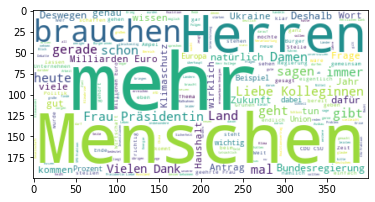

In [5]:
#person = 'Bernd Rützel'
#untermenge = [ rede for rede in alleReden if person in rede['name']]

thema = 'Klima'
untermenge = [ rede for rede in alleReden if thema in rede['text']]

print(f'Die Suche nach "{thema}" ergab {len(untermenge)} Reden')
print(f'\n')

textlist = [rede['text'] for rede in untermenge]
text = " ".join(textlist)


german_stop_words = nltk.corpus.stopwords.words('german')

german_stop_words.append('ja')
german_stop_words.append('Deutschland')
german_stop_words.append('Kollegen')
german_stop_words.append('müssen')
german_stop_words.append('helfen')


# Generate a word cloud image
wordcloud = WordCloud(stopwords = german_stop_words, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.show()


# Aufgabe zum weiteren Verständnis

1. Füge der Stop-Wort-Liste (german_stop_words) weitere Worte hinzu und visualisiere die entsprechende Word-Cloud.